# Week 11-3 Batch Gradient Descent
#### Machine Learning with Python by idebtor@gmail.com

-----------------------------------


## 1.1 Batch GD 코드

In [1]:
#%%writefile code/MnistBGD.py
#%load code/MnistBGD.py
import numpy as np
class MnistBGD_LS(object):
    """ Batch Gradient Descent
    """
    def __init__(self, n_x, n_h, n_y, eta = 0.1, epochs = 100, random_seed=1):
        """ 
        """
        self.n_x = n_x
        self.n_h = n_h
        self.n_y = n_y
        self.eta = eta
        self.epochs = epochs
        np.random.seed(random_seed)
        self.W1 = 2*np.random.random((self.n_h, self.n_x)) - 1  # between -1 and 1
        self.W2 = 2*np.random.random((self.n_y, self.n_h)) - 1  # between -1 and 1
                
    def forpass(self, A0):
        Z1 = np.dot(self.W1, A0)          # hidden layer inputs
        A1 = self.g(Z1)                      # hidden layer outputs/activation func
        Z2 = np.dot(self.W2, A1)          # output layer inputs
        A2 = self.g(Z2)                       # output layer outputs/activation func
        return Z1, A1, Z2, A2

    def fit(self, X, y):
        self.cost_ = []
        m_samples = len(y)       
        Y = joy.one_hot_encoding(y, self.n_y)       # (m, n_y) = (m, 10)   one-hot encoding
        
        # learning rate is scheduled to decrement by a step of which the inteveral from 0 to eta
        # eqaully divided by total number of iterations (or epochs * m_samples)
        learning_schedule = np.linspace(self.eta, 0.0001, self.epochs)
        
        # for momentum
        #self.v1 = np.zeros_like(self.W1)
        #self.v2 = np.zeros_like(self.W2)
        
        for epoch in range(self.epochs):
            if (epoch) % 100 == 0:
                print('Training epoch {}/{}.'.format(epoch + 1, self.epochs))

            # input X can be tuple, list, or ndarray
            A0 = np.array(X, ndmin=2).T       # A0 : inputs, minimum 2 dimensional array
            Y0 = np.array(Y, ndmin=2).T       # Y: targets

            Z1, A1, Z2, A2 = self.forpass(A0)   # forward pass

            E2 = Y0 - A2                           # E2: output errors
            E1 = np.dot(self.W2.T, E2)          # E1: hidden errors

            # back prop and update weights
            #self.W2 += self.eta * np.dot(E2 * A2 * (1.0 - A2), A1.T)
            #self.W1 += self.eta * np.dot(E1 * A1 * (1.0 - A1), A0.T)

            # back prop, error prop
            dZ2 = E2 * self.g_prime(Z2)        # backprop      # dZ2 = E2 * A2 * (1 - A2)  
            dZ1 = E1 * self.g_prime(Z1)        # backprop      # dZ1 = E1 * A1 * (1 - A1)  

            # udpate weight with momentum
            # eta = learning_schedule[epoch]
            #self.v2 = 0.9 * self.v2 + self.eta * np.dot(dZ2, A1.T) / m_samples
            #self.v1 = 0.9 * self.v1 + self.eta * np.dot(dZ1, A0.T) / m_samples
            #self.W2 += self.v2     
            #self.W1 += self.v1 
            
            # update weights without momentum
            #eta = learning_schedule[epoch]           
            self.W2 += self.eta * np.dot(dZ2, A1.T) / m_samples     
            self.W1 += self.eta * np.dot(dZ1, A0.T) / m_samples     

            self.cost_.append(np.sqrt(np.sum(E2 * E2)))
        return self

    def predict(self, X):
        A0 = np.array(X, ndmin=2).T         # A0: inputs
        Z1, A1, Z2, A2 = self.forpass(A0)   # forpass
        return A2                                       

    def g(self, x):                 # activation_function: sigmoid
        x = np.clip(x, -500, 500)   # prevent from overflow, 
        return 1.0/(1.0+np.exp(-x)) # stackoverflow.com/questions/23128401/
                                    # overflow-error-in-neural-networks-implementation
    
    def g_prime(self, x):                    # activation_function: sigmoid derivative
        return self.g(x) * (1 - self.g(x))
    
    def evaluate(self, Xtest, ytest):       # fully vectorized calculation
        m_samples = len(ytest)
        scores = 0        
        A2 = self.predict(Xtest)
        yhat = np.argmax(A2, axis = 0)
        scores += np.sum(yhat == ytest)
        return scores/m_samples * 100
    
    def evaluate_onebyone(self, Xtest, ytest):
        m_samples = len(ytest)
        scores = 0
        for m in range(m_samples):
            A2 = nn.predict(Xtest[m])
            yhat = np.argmax(A2)
            if yhat == ytest[m]:
                scores += 1
            #if m < 5:
                #print('A2.shape', A2.shape)
                #print('A2={}, yhat={}, ytest={}'.format(A2, yhat, ytest[m]))
        
        return scores/m_samples * 100
    

## 1.2 학습결과

In [3]:
import joy
(X, y), (Xtest, ytest) = joy.load_mnist()
X, y = X[:1000], y[:1000]
Xtest, ytest = Xtest[:100], ytest[:100]
nn = MnistBGD_LS(784, 100, 10, eta = 0.1, epochs = 1000)
nn.fit(X, y)
accuracy = nn.evaluate(Xtest, ytest)
print('Accuracy {}%'.format(accuracy))

Training epoch 1/1000.
Training epoch 101/1000.
Training epoch 201/1000.
Training epoch 301/1000.
Training epoch 401/1000.
Training epoch 501/1000.
Training epoch 601/1000.
Training epoch 701/1000.
Training epoch 801/1000.
Training epoch 901/1000.
Accuracy 77.0%


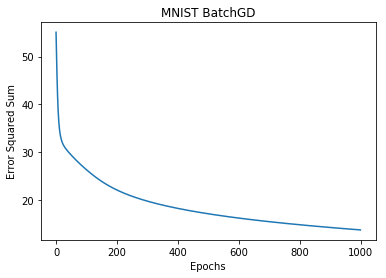

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(nn.cost_)), nn.cost_)
plt.title('MNIST BatchGD')
plt.xlabel('Epochs')
plt.ylabel('Error Squared Sum')
plt.show()

## 2.1 Stochastic GD 코드

In [5]:
#%%writefile code/MnistSGD_LS.py
#%load code/MnistSGD_LS.py
class MnistSGD(object):
    def __init__(self, n_x, n_h, n_y, eta = 0.1, epochs = 1, random_seed=1):
        self.n_x = n_x
        self.n_h = n_h
        self.n_y = n_y
        self.eta = eta
        self.epochs = epochs
        np.random.seed(random_seed)
        self.W1 = 2*np.random.random((self.n_h, self.n_x)) - 1  # between -1 and 1
        self.W2 = 2*np.random.random((self.n_y, self.n_h)) - 1  # between -1 and 1
        #print('W1.shape={}, W2.shape={}'.format(self.W1.shape, self.W2.shape))
        
    def forpass(self, A0):
        Z1 = np.dot(self.W1, A0)          # hidden layer inputs
        A1 = self.g(Z1)                   # hidden layer outputs/activation func
        Z2 = np.dot(self.W2, A1)          # output layer inputs
        A2 = self.g(Z2)                   # output layer outputs/activation func
        return Z1, A1, Z2, A2

    def fit(self, X, y): 
        self.cost_ = []
        self.m_samples = len(y)
        Y = joy.one_hot_encoding(y, self.n_y)       # (m, n_y) = (m, 10)   one-hot encoding
        
        # learning rate is scheduled to decrement by a step of which the inteveral from 0 to eta
        # eqaully divided by total number of iterations (or epochs * m_samples)
        # eta_scheduled = np.linspace(self.eta, 0.0001, m_samples * self.epochs)
        
        for epoch in range(self.epochs):
            print('Training epoch {}/{}'.format(epoch+1, self.epochs))
            
            for m in range(self.m_samples):            
                # input X can be tuple, list, or ndarray
                # random_index = np.random.randint(m_samples)
                A0 = np.array(X[m], ndmin=2).T     # A0 : inputs, minimum 2 dimensional array
                Y0 = np.array(Y[m], ndmin=2).T    # Y: targets

                Z1, A1, Z2, A2 = self.forpass(A0)          # forward pass

                E2 = Y0 - A2                       # E2: output errors
                E1 = np.dot(self.W2.T, E2)         # E1: hidden errors

                # back prop, error prop
                dZ2 = E2 * self.g_prime(Z2)       
                dZ1 = E1 * self.g_prime(Z1)     

                # update weights
                # eta = eta_scheduled[epoch * m_samples + m]
                self.W2 +=  self.eta * np.dot(dZ2, A1.T)     
                self.W1 +=  self.eta * np.dot(dZ1, A0.T)    
                
                self.cost_.append(np.sqrt(np.sum(E2 * E2)))
        return self

    def predict(self, X):
        A0 = np.array(X, ndmin=2).T         # A0: inputs
        Z1, A1, Z2, A2 = self.forpass(A0)   # forpass
        return A2                                       

    def g(self, x):                 # activation_function: sigmoid
        x = np.clip(x, -500, 500)   # prevent from overflow, 
        return 1.0/(1.0+np.exp(-x)) # stackoverflow.com/questions/23128401/
                                    # overflow-error-in-neural-networks-implementation
    
    def g_prime(self, x):                    # activation_function: sigmoid derivative
        return self.g(x) * (1 - self.g(x))
    
    def evaluate(self, Xtest, ytest):       # fully vectorized calculation
        m_samples = len(ytest)  
        A2 = self.predict(Xtest)
        yhat = np.argmax(A2, axis = 0)
        scores = np.sum(yhat == ytest)
        return scores/m_samples * 100
        
    def evaluate_onebyone(self, Xtest, ytest):
        m_samples = len(ytest)
        scores = 0
        for m in range(m_samples):
            A2 = self.predict(Xtest[m])
            yhat = np.argmax(A2)
            if yhat == ytest[m]:
                scores += 1
        return scores/m_samples * 100

## 2.2 학습결과

In [6]:
import joy 
(X, y), (Xtest, ytest) = joy.load_mnist()

nn = MnistSGD(784, 100, 10, eta = 0.1, epochs = 20)
nn.fit(X[:1000], y[:1000])
acy = nn.evaluate(Xtest[:200], ytest[:200])
print('Accuracy {}%'.format(acy))

Training epoch 1/20
Training epoch 2/20
Training epoch 3/20
Training epoch 4/20
Training epoch 5/20
Training epoch 6/20
Training epoch 7/20
Training epoch 8/20
Training epoch 9/20
Training epoch 10/20
Training epoch 11/20
Training epoch 12/20
Training epoch 13/20
Training epoch 14/20
Training epoch 15/20
Training epoch 16/20
Training epoch 17/20
Training epoch 18/20
Training epoch 19/20
Training epoch 20/20
Accuracy 87.0%


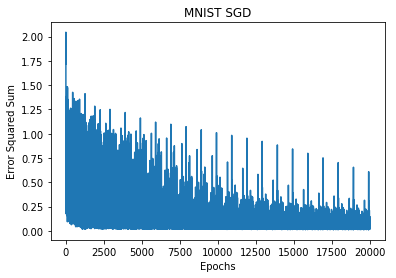

In [7]:
plt.plot(range(len(nn.cost_)), nn.cost_)
plt.title('MNIST SGD')
plt.xlabel('Epochs')
plt.ylabel('Error Squared Sum')
plt.show()

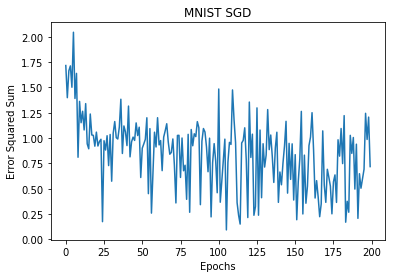

In [8]:
plt.plot(range(len(nn.cost_[:200])), nn.cost_[:200])
plt.title('MNIST SGD')
plt.xlabel('Epochs')
plt.ylabel('Error Squared Sum')
plt.show()

----------
_In the beginning God created the heavens and the earth. Genesis1:1_